In [28]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories

np.float = float  #temporary fix

sys.path.append('../AppStat2023/External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [29]:
# First we set the parameters of the program:
N_exp = 100000           # Number of "experiments" (i.e. drawing from random distributions)
r = np.random
r.seed(42)

In [30]:
L, sigL = 1.8388, 0.0002
T, sigT = 2.7208, 0.0006

In [31]:

cov = np.array([[sigL**2, 0],
                [0, sigT**2]])

x_all = np.random.multivariate_normal([L, T], cov, size=N_exp)

y_all = x_all[:,0] * (2*np.pi/x_all[:,1])**2

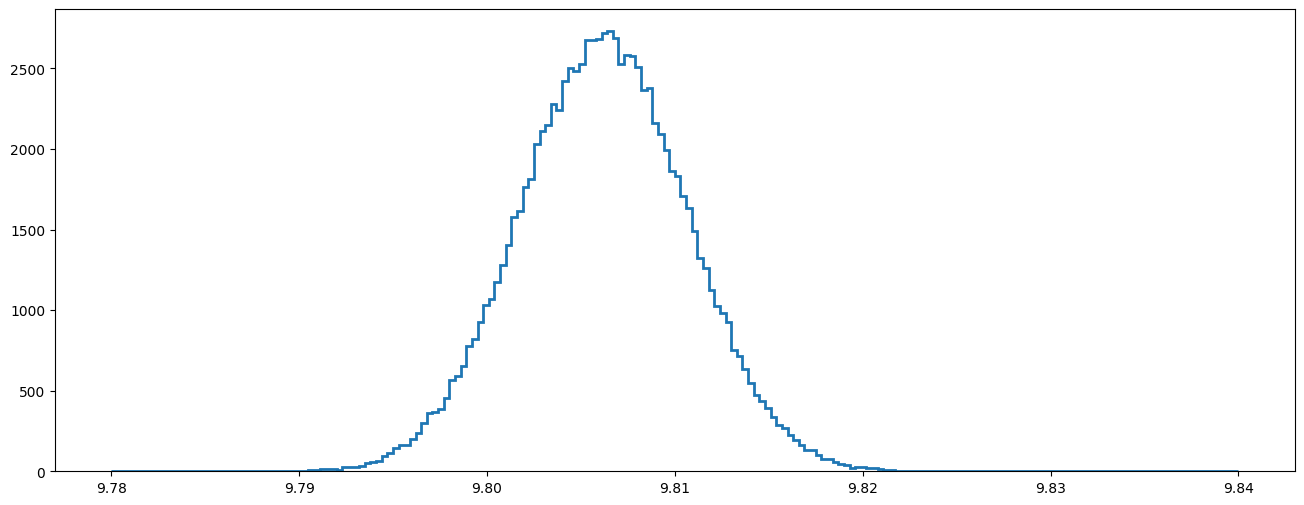

In [36]:
# Always make sure, that you control the binning and range!
nbins = 200
xmin, xmax = 9.78, 9.84
binwidth = (xmax-xmin)/nbins

fig2, ax2 = plt.subplots(figsize=(16, 6));
counts, bin_edges, _ = ax2.hist(y_all, nbins, range=(xmin, xmax), histtype='step', linewidth=2, label="simulation")
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
s_counts = np.sqrt(counts)

In [37]:
mean = y_all.mean()
std = y_all.std(ddof=1)
print(f"  Mean = {mean:5.3f},    Std = {std:5.3f}")

  Mean = 9.806,    Std = 0.004


In [38]:
def gaussian(x, N, mu, sigma):
    return N * binwidth / (sigma*np.sqrt(2*np.pi)) * np.exp(-0.5* (x-mu)**2/sigma**2)

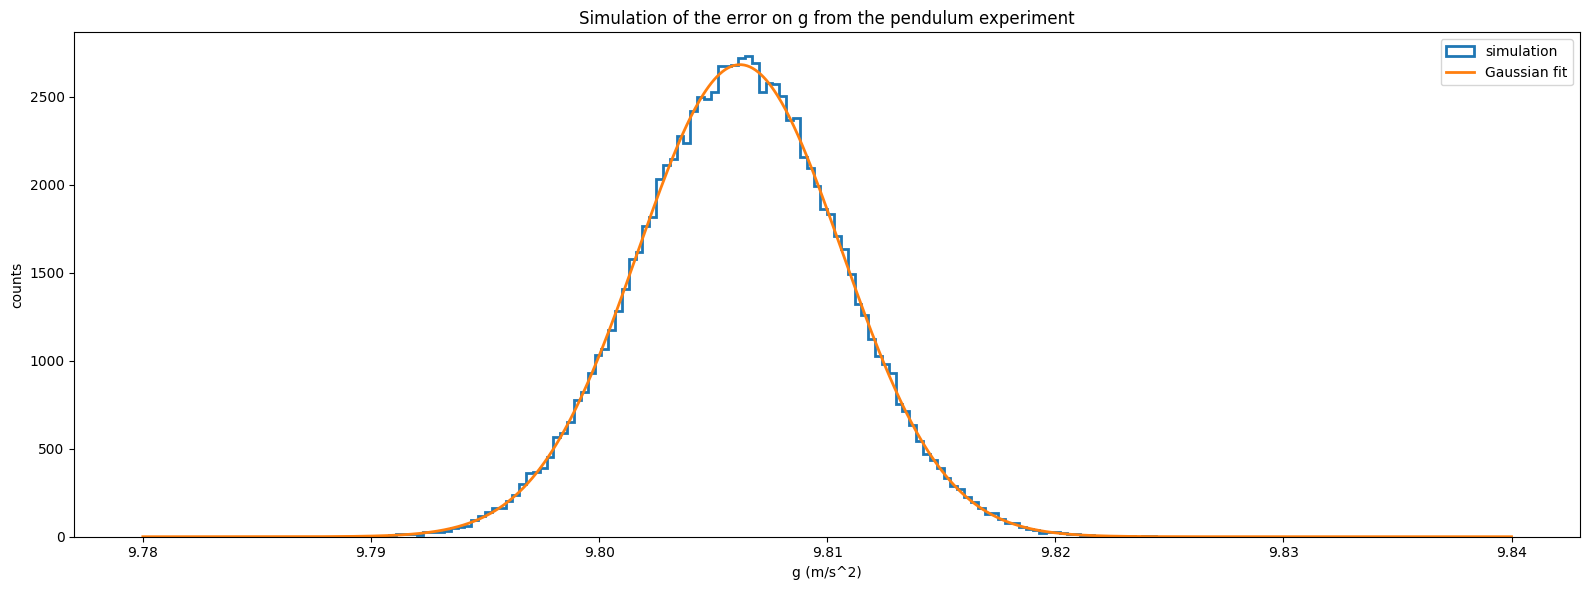

In [39]:
xaxis = np.linspace(xmin, xmax, 1000)
yaxis = gaussian(xaxis, N_exp, mean, std)
ax2.plot(xaxis, yaxis, linewidth=2, label="Gaussian fit")
ax2.set_xlabel("g (m/s^2)")
ax2.set_ylabel("counts")
ax2.set_title("Simulation of the error on g from the pendulum experiment")
ax2.legend()
fig2.tight_layout()
fig2